#  <center>RECONNECT:</center> <center>aeRosol nEw partiCle fOrmatioN aNd sEa iCe melT 
<center>Report for e-science course 2022 </center>


<center>Lovisa Nilsson lovisa.nilsson@nuclear.lu.se </center>
<center>Department och Nuclear Physics</center>
<center>Lund Univeristy</center>


## Abstract
text text text

## Acknowledgements
Data
Group members+supervisors
Scripts


## Introduction

The Artcic has during the last decades experienced a faster warming than any other part of the globe [REF]. The response to increased temperature in the Arctic environment implies reduction of sea ice cover and glaciers, melting permafrost and ecological pressure on the Arctic environment and species [REF]. Moreover, the interaction between the atmosphere, ocean and land is affected [bla bla marine production etc…………….]. 

The Arctic is in many ways an extreme environment which is also reflected in the annual cycle of airborne particulate matter. During the dark months, ocean and air circulation patterns implies an influx of anthropogenic pollutants, and the aerosol size distribution is dominated by accumulation mode particles. In combination with the Arctic wintertime meteorological conditions, this leads to the formation of a persistent Arctic haze. As the sun gradually returns, the circulation and airmass transport patterns changes and the anthropogenic pollution inflow is restricted [REF]. Formation of low-level clouds during summertime leads to removal of accumulation mode particles by wet scavenging marks the end of the Arctic Haze period [REF]. Consequently, the composition, properties, and size distribution of Arctic aerosol particle change. The lower aerosol load and increased availability of sunlight promotes photochemistry and results in a peak of in aerosol particles smaller than 100 nm [REF]. [Blab la NPF + precursor gases]
 At the Zeppelin mountain station [add location] long- term measurements are conducted to monitor the properties of aerosol particles, gaseous species and meteorological parameters (?). Long term measurements are valuable to discern changes…….


## Method

text text text

Describe what DMPS is and what bins are etc, cant be sassumed that reader knows what it is. Describe Zeppelin. Decibe Theil Sen and data sets, 
normalized for data cover. The Thiel-Sen slope is suitable to study periods when there is no influence of seasonality. To study trends with seasonal variation, other methods such 

### Import packages

And make sure that functions are auto-updated.

In [1]:
import DMPS_functions as fu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import seaborn as sns
import scipy as sc
import glob 
import sklearn.metrics as skm
from sklearn import metrics
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import KMeans
import scipy.stats as st
import seaborn as sns
from matplotlib import cm

# Auto-update the functions. Useful if the functions have been altered. 
%load_ext autoreload
%autoreload 2

plt.rcParams['font.size'] = '12'

In [2]:
# Defining the path containg all DMPS data
path = 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\'

In [3]:
# Using glob to import the files in the specified path
fu.importData(path)

Loading each year of 30 min resolution DMPS data into a dataframe and create a list containing all dataframes.
Column headings are added, and data flagged as invalid is removed.

In [4]:
DFs_DMPS = fu.load_and_append_DMPS(path, 
                             name_in_file='DMPS')

### Concatenate DMPS data 
The DMPS data comes in several files and must be concatenated into a common dateframe, and unessary columns are dropped.

In [5]:
df_DMPS = fu.concat_df_DMPS(DFs_DMPS)

Useful variables are defined column headings renamed to ease calling of specific columns.

In [6]:
# Get a list with the DMPS bin column names as strings and floats to call column in dataframe and for calculations.
bin_col_list = fu.get_bin_column_string_list()
bin_cols = fu.get_bins(bin_col_list)
bin_cols = [float(x) for x in bin_cols]

# Rename the column headings for midpoint diameters to numeric values with less decimals.
df_DMPS = fu.renameDpColumns(df_DMPS, bin_col_list)

# Make a list of all the "real" non-rounded midpoint diameters as a list and as array.
diameterList, diameters = fu.getFloatDiameterListAndArray()

# Make a list of diameters as string-objects
diameters_as_strings = [str(x) for x in diameters]

### Resampling to hourly averages 
The function ``resample`` was used to convert the 30 min DMPS particle size distribution data to a dataframe containing the 1 hour average. The python function ``resample`` fills the gaps in the data by adding rows for gap days/months/hours with NaN-values to get a continous dataset. Because of this, rows containing only NaN values are dropped. 

In [7]:
df_hourly_2010_2020_mean  = df_DMPS.resample('H').mean()
df_hourly_2010_2020_mean  = df_hourly_2010_2020_mean.dropna(how='all')

The first rows of the dataframe is shown below. The first two columns contain data from two different CPC:s, i.e. condensation particle counters which count particles and yield the particle concentration in #/cm$^3$. The UFCPC (ultrafine CPC) has a lower particle diameter threshold at 3 nm in comparision with the CPC3010 whose lower threshold is at 10 nm. The third colum Ntot contains the total particles number concentration as computed by the DMPS. The rest of the columns specify the midpoint size (nm) of the bins for which the values indicate the log-normal distribution (#/cm$^3$). The last column (not visable indicates flags indicating the validity of the data. Unvalid data was removed by ``concat_df_DMPS`` function.   

In [8]:
df_hourly_2010_2020_mean.head(2)

,UFCPC,CPC3010,Ntot,5.012,5.623,6.31,7.079,7.943,8.913,10.0,...,281.838,316.228,354.813,398.107,446.684,501.187,562.341,630.957,707.946,flag
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-08-03 00:00:00,0.0,192.743870,243.84122,2.808560e-29,2.806373e-29,2.803910e-29,2.801134e-29,2.798005e-29,2.794476e-29,2.790497e-29,...,41.174992,30.989534,24.949570,12.333647,2.245721,0.025513,2.092485e-29,NaN,NaN,0.0
2010-08-03 01:00:00,0.0,182.486285,208.74371,2.807999e-29,2.805812e-29,2.803348e-29,2.800572e-29,2.797443e-29,2.793914e-29,2.789934e-29,...,25.441111,16.356454,11.408104,6.106511,2.259782,1.784399,1.099211e+00,NaN,NaN,0.0


### Identifying NPF events

One aims of this report is to conduct a brief investigation of different methods to identify NPF events. Some different methods are tested to identify the NPF events:

* By calculation of $\frac{N_{D_p<10nm}}{N_{tot}}$ 
* By using K-means clustering
* By calculating the difference between the UFCPC and the CPC 

Below the methods are decribed in more detail.

#### Method 1: Using $N_{D_P <x}/N_{tot}$ 

The motivation to use the first metod is that in the event of NPF, there will by a drastic increase in number concentration of particles in smallest size bins, and the ratio of particles in the smaller bins to should be elevated. The first method requires that the total number concentration $N_{tot}$ is calculated in a given diameter range. To do this, the log-normal distribution which is provided by the DMPS has to be integrated. Linn Karlsson (e-Science course participant 2017) should be acknowledged for great inspiration to the method used in this work (Linn's method invloved the use of dictionaries but here arrays are used instead).  

The ``calcNtot`` calculates the particle concentration by integrating in a given bin midpoint diameter interval ``diameters`` and adds a column in the returned dataframe containg the calculated values.

In [9]:
# Calculate the total particle number concentration for the 1 h resolution data
df_hourly_2010_2020_mean_ntotCalc  = fu.calcNtot(diameters, df_hourly_2010_2020_mean,diameters_as_strings) 

The result from the integration of the full size distribution is compared to Ntot given in the DMPS data, and they appear to be in good aggrement (slope of 1 and $R^2$ close to 1). 

R-squared: 0.999363
Intercept: 0.0445901316076629
Slope: 1.0004705430431775


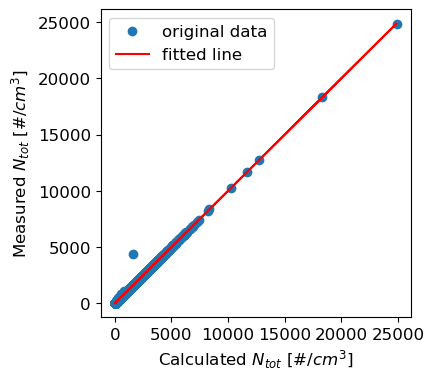

In [10]:
varx = df_hourly_2010_2020_mean_ntotCalc['NtotCalc'].values
vary = df_hourly_2010_2020_mean_ntotCalc['Ntot'].values

fu.compareIntegration(varx,vary)

#### Method 2: K-means clustering

The second approach to identify NPF events involves K-means clustering (using ``sklearn.cluster.Kmeans``) of the long-term DMPS dataset which is an unsupervised machine learning algorithm. In short, unsupervised machine learning as opposed to supervised, involves data without labels and the data is grouped based in similarity of the data. This approach was previously deployed by Dall'Osto et al. (2017) to identify NPF events from size distribution data at the Zeppelin, and therfore it is interesting try the same approach. Clustering of data implies grouping similar objects together based on different features of the data. The K-means algorithm means that the data is divided into to a user defined number of cluster ($k$). The K-means algorithm starts by picking k random datapoints and assigns them as centres of the cluster (centroids). Then distance of the other data points to the centroids are then calculated and they are assigned to the nearest cluster centroid. Then the process of assigning new centroids starts over and the data is reassigned. This process is then repeated several times until the final clusters are established.  

Following the approach of Dall'Osto et al. (2017), we cluster according to the shape of the distribution. Prior to applying the K-means clustering the size distribution data must therefore be normalized, and the optimal numbers of clusters needs to be determined.  

In [11]:
df3, df_daily_2010_2020_1h_mean_norm = fu.create_normalised_df(df_hourly_2010_2020_mean)

For the hourly averaged data some endpoint columns where dropped in order for the clustering to work. Apparently the K-means method was very sensitive to the (in most cases) low concentrations in the endpoints. This might indicate that the clustering method is not too robust. Normally particle number concentrations are low in the end bins, and by dropping them it is reasonable to assume that the overall size distribution shape should be preserved.  

In [12]:
df_hourly_norm_dropped = df_daily_2010_2020_1h_mean_norm.copy()
df_hourly_norm_dropped = df_hourly_norm_dropped.drop \
                         (columns=['norm5.012','norm630.957','norm707.946'])

##### Optimizing the number of clusters 

The optimal cluster number *k* for K-means clustering needs to be decided upon. This could be done using several methods. Here the inertia method and the average silhouette score is used. 

The inertia method implies calculating the mean squeared distance of each clusters to its nearest centroid. As a rule of thumb a good clustering model has a low inertia and low number of clusters. If *k* equals the number datapoints, the inertia equals zero, so while choosing the optimal *k* there is a trade off between inertia and number of clusters. To find the optimal *k* the elbow in the inertia vs $k$ is identified, where the increase in *k* implies a slower decrease in inertia. 

The Silouette score generates a number between -1 and 1. The closer the Silouette score is to 1, the better cluster are distiguished from each other. A score of 0 implies that clusters are not well distinguished and -1 that clusters are wrongly assigned. Here, the average silouette score is computed which informs on the average spearation of all clusters. Ideally the Silouette score is calulated for individual samples as well (out of the scope of this work) to optimize the choice of *k*.

Optimization was done for varying *k* between 2 and 13 clusters. 

In [13]:
#fu.optimizeClusters(df_hourly_norm_dropped)   

From the inertia method it is not straightforward to define the elbow, where adding more clusters results in a minor decrease of inertia. It is clear that the average silhoutette score of the clusters decrease with increasing number of clusters.

The optimal cluster number was here decided to *k* = 5, rather than 4 as inertia decrease less for each added cluster when *k* > 4. Six clusters did not improve the silouette score and five clusters is prefered over seven as inertia is higher when *k* = 5. 

#### Method 3: Utilizing the different CPC's 
The last metod to indentify the NPF events invloves taking advantage of the different detection limits of the UFCPC (3 nm) and CPC3010 (10 nm) that was provided in the dataset in addition to the DMPS data. Two different approaches where tested: taking the absolte difference between the instruments and by computing the ratio of measured concentrations. 

## Results

### K-means clustering
The clustering was performed using $k$ = 5 clusters. 

In [14]:
# Optimal cluster number 
n_clusters = 5

#Perform K-means clustering
silhouette_avg_1h, inertia1h, df_norm_clustered_1h_mean = fu.perform_clustering(df_hourly_norm_dropped, n_clusters)

# Define the unique number of size distribution clusters in the sence that peak diameter is different.
clusters = np.unique(df_norm_clustered_1h_mean['clusters'].values)

# Check that the number of clusters resulting from the clustering procedure is equal to the variable ``n_clusters``, 
# i.e. that the peak diameters of the clustered size distributions are unique. Print result.
fu.checkUniqueModeDiam(df_norm_clustered_1h_mean,n_clusters)

OK! Clusters peak for different diameter when number of clusters =  5


Each hourly distribution was assigned a cluster ID during the clustering. The mean, standard devitation, median, 10- and 90-percentiles of the clustered data was calulated for each cluster in order to visulize the results of the clustering procedure. 

In [15]:
df_norm_clustered_1h_mean_median = df_norm_clustered_1h_mean.groupby('clusters').median()
df_norm_clustered_1h_10q         = df_norm_clustered_1h_mean.groupby('clusters').quantile(.1)
df_norm_clustered_1h_90q         = df_norm_clustered_1h_mean.groupby('clusters').quantile(.9)

df_norm_clustered_1h_mean_mean   = df_norm_clustered_1h_mean.groupby('clusters').mean()
df_norm_clustered_1h_std         = df_norm_clustered_1h_mean.groupby('clusters').std()

Below, the mean +/- 1$\sigma$ (shaded area) of the normalized and clustered size distribution data is shown. The median is plotted as a dotted line for comparision. From the graph it is clear that median and mean are similar. From this we drew the conclusion that cluster 1 and 2 may represent NPF events, although both 1 & 2 are bimodal and extends to the accumulation mode. Varying the cluster number did not remove the bimodality for the clusters whose normalized distributions peak occurs for $D_p$ < 100 nm. Moreover, clustering mean and median daily distributions using 5 clusters displyed high similarty with the clsuters showwn below (daily clustering is not shown here).  

Comparing the results of our clustering analysis with that of Dall'Osto et al. (2017) and their daily mean clusters a few qualitative observations could be made. Firstly, two of the clusters classified as NPF indicators nucleation or bursting by Dall'Osto et al. (2017) which peak at 10 nm or lower, are most similar to our cluster 1 (however, their data was not normalised, nor were clusters plotted alongside each other which may make absolute comparision difficult).These clusters also have tails extending into the accumulation mode although the bimodality is absent or not as pronounced in our hourly (nor daily or median) clusters. It should also be mentioned that their third NPF indicator cluster (nascent) partly show similarity with our cluster 3 on the left hand side of the peak, although our cluster 3 appear to be a superposition of two modes and therfore we diregarded this cluster as an indicator of NPF. 

Lastly, the accumulation mode clusters (cluster 4 and 5) in our analysis differ from the two accumulation mode clusters identified by Dall'Osto et al. in the sense that also display bimodality which was note the case in their study. 

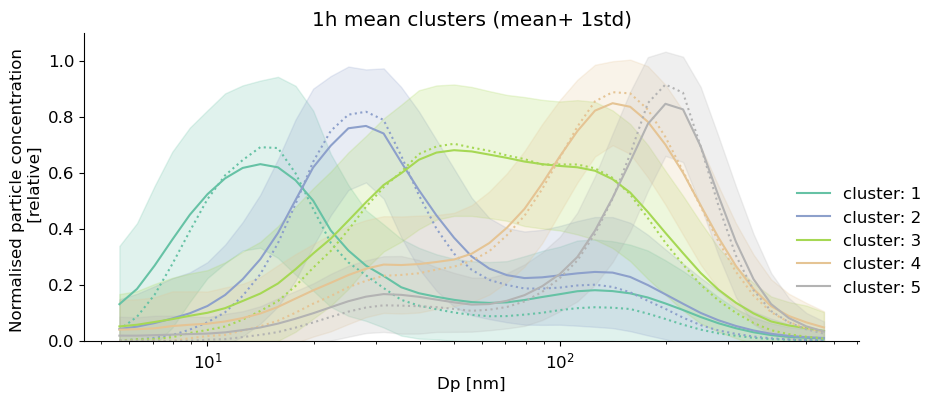

In [16]:
fu.plotClustersNormalized(df_norm_clustered_1h_mean, diameters,
                          df_norm_clustered_1h_mean_mean, df_norm_clustered_1h_std,
                          df_norm_clustered_1h_mean_median)

### Comparision of NPF indicators
To make a simple comparision between the three methods used to identify NPF events (CPC-approaches, integration method and clustering) the annual cycle of the three proxies is shown below. 

In the top panel the results from the absolute difference CPC method are shown, and mid panel shows the difference between the CPC:s. For some instances one of the CPC's appear not have been in operation as it showed zero values while DMPS or other CPC was in operation. Therfore for these occasions where one CPC equals zero, the data is excluded. In the midpanel the integration method results for a diameter threshold diameter of 10 nm is shown and indicated by the black dashed line, and the shaded area shows the 10 and 90 percentiles of the data. Note that this variable is plotted on the right y-axis. In the lower panel, the annual cycles plotted as occurence in hours of the clusters is shown. The cluster chosen to represent NPF event is cluster 1 and 2 are highlighted. 

From the reults in the top panel the abosolute difference between CPC:s indicate a reasonable annual NPF cycle (and similar to that of cluster 1,2 and 3), which is in contrast to the difference between the CPC:s. As the same masking was applied to this data as for only taking the difference between the CPCs (mid panel) the absolute difference is likely not a good NPF proxy.

It can be observed that the data in the mid panel displays an annual cycle not typically associated with NPF events at Zeppelin in previous studies (Dall'Osto et al.,2017; Tunved et al., 2013). Their annual trends indicates peak in the dark months associated with Arctic haze and therefore this method is discarded. These indicators are threfore disregarded as NPF indicators. Taking the ration between the UF CPC and normal CPC to identify NPF was also dicarded (not shown here) as taking ratios between numbers with small differences makes it hard to discearn real differences. Another important conclusion is that the integration method was not succesful for the choice of thresholds equal to neither 10,20 or 30 nm (only 10 nm is shown). 

Regarding the clusters in the lower panel, it can be observed that cluster 1 and 2 exhibits annual trends expected for NPF events. However, cluster 3 depicts a similar trend although it was discared due its very broad size distribution. The accumulation mode clusters (4,5) however follow the expect annual cycle related to the Arctic Haze phenomena. It could also be pointed out that Dall'Osto et al. (2017) produced a similar plot for their NPF indicating clusters indicating similar patterns as for cluster 1-3. With regards to annual cycle (not size distribution), our cluster 1,2,3 depicts a similar trend as to their bursting cluster whith peaks in May and close to September, rather than in the middle of the summer which was the case for their nucleation and nascent clusters. It can be concluded that of all studied methods, the clustering method is likely the best proxy for further investigation of NPF events in this project.  

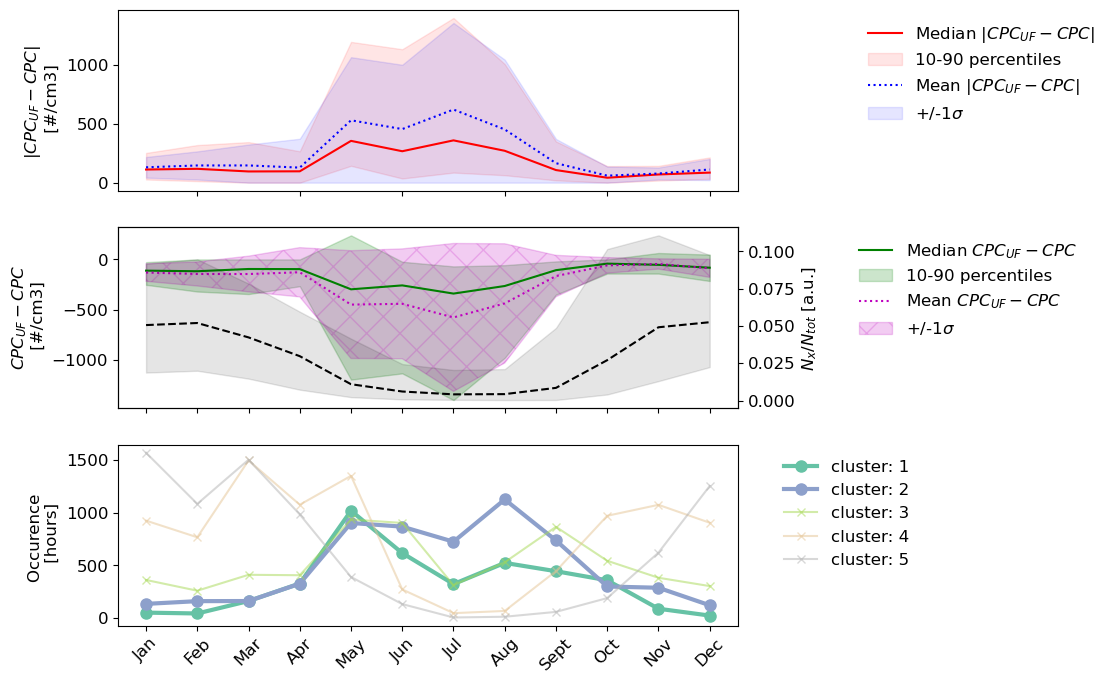

In [17]:
# Input DFs, clusters, threshold = 10 nm for when to integrate
fu.plotNPFproxys(df_hourly_2010_2020_mean,
              df_norm_clustered_1h_mean,
              clusters,
              bin_cols,10,diameters,diameters_as_strings)

The annual frequency distribution of the clusters is displyed as a normalized stacked bar plot of clusters over the studied years (2010-2020). During the summer months, cluster 1,2 and 3 dominate as opposed to the dark months were the accumulation mode clusters dominate. This strengthens the assumption that cluster 4 and 5 are indicators of Arctic haze and antropogenic influence (Schmale & Baccarini, 2021). It is evident that cluster 1 and 2 dominate during the summer months. Cluster 3 (not chosen to indicate NPF) appears to follow a similar trend although it is present to higher degree than especielly cluster 1 wintertime. However, cluster 3 remains excluded as an NPF proxy due to the shape of its size distribution. 

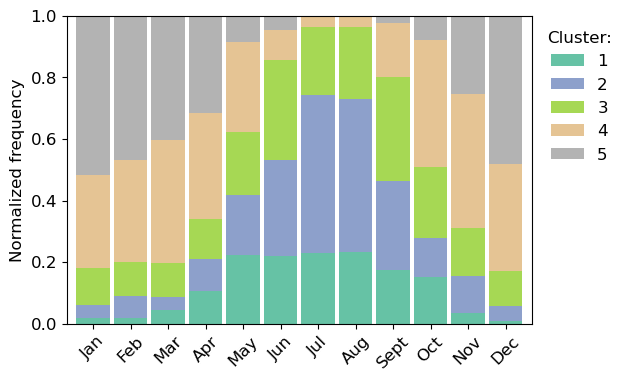

In [18]:
fu.makeStackedPlot(df_norm_clustered_1h_mean,clusters)

### Trend for NPF events

From the previous results, it can be concluded that the clustering presents the best choice in comparsion to the other methods to study trends in NPF at Zeppelin. Potentially it could be interesting to study the trend over the years for the different clusters although such analysis excluded taking into account variation in NPF drivers such as meteorological conditions or variations in NPF precursors or other processes affecting the soures of these such as sea ice extent. We normalized the cluster frequencies to account for data coverage so that cluster occurence would not be biased. 

First the, monthly occurence needs to be determined for each year and cluster. ``df_clusters_seqMonth_T`` is the transformed version of ``df_clusters_seqMonth`` which contains one row for each sequential month in the dataset, and columns for all the clusters where the occurence of each cluster is given. It also contain a column which gives the total amount of hours a cluster was represented during this month and the month given by number. 

In [19]:
df_clusters_seqMonth, df_clusters_seqMonth_T = fu.prepareDFforTrendPlot(df_norm_clustered_1h_mean,clusters)

Choose months of interest in and a dataframe which is normalized for the data coverage for plotting is returned by ``makeDFforTrend``. The months May to July where chosen as this is the time for when the satalitte retirieved chlorophyll has its annual peak (see Keis project). 

In [20]:
# Define the period of interest in terms of months
MJJ_list = [5,6,7]
all_months_list = [1,2,3,4,5,6,7,8,9,10,11,12]

df_norm_MJJ = fu.makeDFforTrend(df_clusters_seqMonth_T,MJJ_list)
df_norm_all = fu.makeDFforTrend(df_clusters_seqMonth_T,all_months_list)

Below, the Theil-Sen slope and 95% confidence interval is plotted which indicates the trend for the months May, June and July for all clusters. The x-axis represents the sequential months (month are counted from the first month of the data set). No obvious trend can be disearned for any of the clusters, although the data display a varying degree of spread. The trends in satelite data for chlorophyll and sea ice (Kei's work) were shown to be spatially heterogenous for this period. To fully exlain the results, additional information is needed, such as airmass origin or trends in aerosol precursors. 

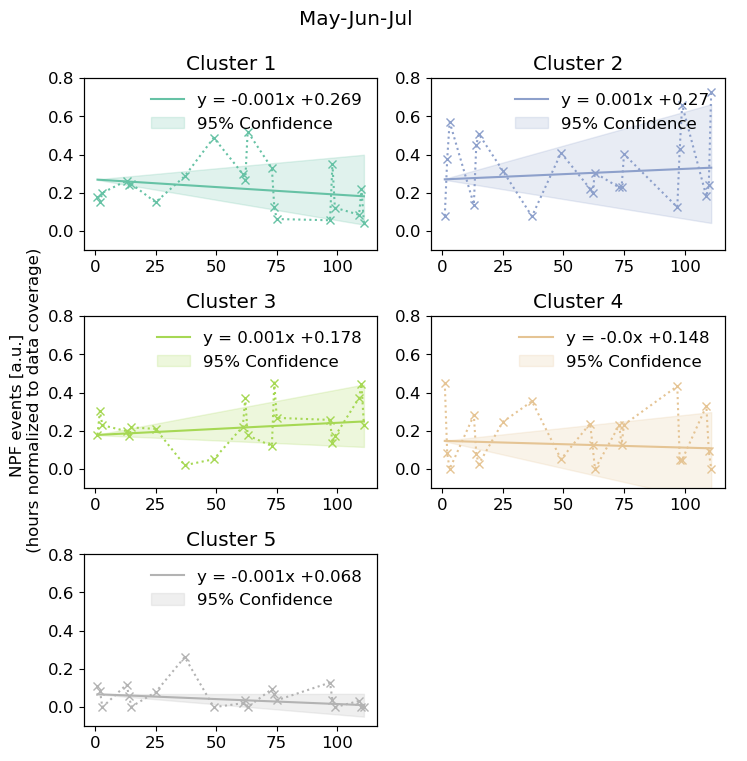

In [21]:
fu.plotThielSen(df_norm_MJJ, clusters,'May-Jun-Jul')

### NPF relation to sea ice concentration 

Our main aims was to make an attempt at reproducing the results from Dall'Osto et al. (2017) who put forward the hypotheis of an anti-correlation between sea ice extent and NPF frequency, i.e. that decresing sea ice in the Barents and Greeland Sea promotes NPF. We investigate weather the anti-correlation holds true when more recent data is used from the Zeppelin station. Dall'Osto et al. (2017) investigated the years 2000-2010 and this part of our study encompass 2010-2017 as there was an overlap between DMPS data and sea ice satelite data for this period. Here, the annual sea ice concentration data (Kei's work) in the Barents and Greenland Sea is used instead of sea ice extent. We normalized the NPF observations to data coverage (in order to remove this dependence) from cluster 1 and 2 and use the annual sum of their frequency as those have been chosen as a proxy for NPF events. First, the annual occurence of cluster 1 and 2 is computed and the sea ice concetration data is loaded. 

In [22]:
# Compute the monthly and yearly normalized count for all clusters
df_monthly_cluster_count = df_norm_all.copy(deep = True)
df_yearly_count_clusters = fu.DFAnnualCount(df_norm_all,clusters)

# Compute the total normlized count for cluster 1 and 2 by adding extra column and removing other clusters (=3,4,5)
monthly_cluster_count_12, df_yearly_cluster_count_12 = fu.sumCluster12(df_monthly_cluster_count,df_yearly_count_clusters)
sea_ice_annual = fu.readSeaIcetoDF()

The results shown below gives little confidence in the hypotheis that NPF at Zeppelin is anti-correlated with sea ice concentration in the studied region between 2010-2017 ($R^2$ = 0.21, $p$ = 0.25). The p-value is the two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero (no correlation). The calcaulated p-value and $R^2$ is not enough to reject this null-hypotheis. There are several explanations that are possible for this. For example, the sample size is quite low, or there is simply no correlation between sea ice concentration in the studied region and NPF, but that does not means changes in other NPF drivers have not occured simoultenously or in other regions which have an effect on NPF drivers. Furthermore, it may be that the 1h-clusters to represent NPF events chose do not capture the NPF events properly.  

0.2537697077894288


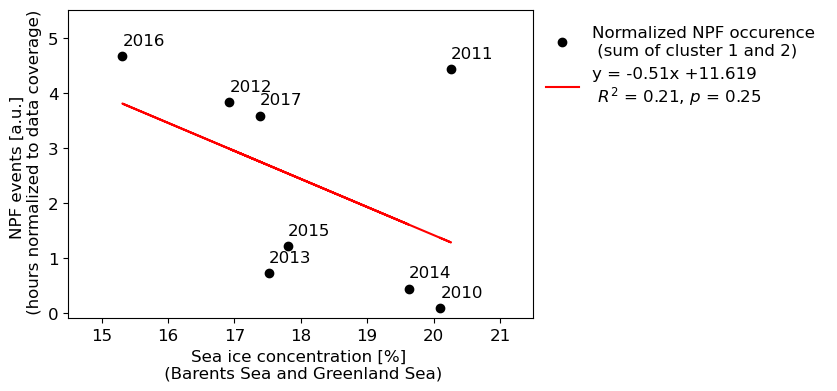

In [23]:
fu.plotNPFvsSeaIce(sea_ice_annual,df_yearly_cluster_count_12)

## Discussion

If normalization is not applied, differences in particle number concentration are also taken into account which too could be considered a feature of the distribution. For example NPF event implies a high number concntration of ultra-fine particles. Clustering the non-normalized size distributions was however unsuccesful in terms of physically unreasonable size distributions for each cluster.

K-means: cluster by normalized vs non-normalized: Non-norm did not work but using the normalized distributions means that important features of the distribution signifying NPF event are lost (very high numb conc of ultrafine particles). Other methods for classyifying the DMPS data may prove helpful -**such as....?** and could be investigated in future studies. Unsupervised algoritms are hard to measure perfomance on.

Noteworthy: Dall ost dunn index very close to zero= Isn't that the worts possible??? 0 worst and higher = better?

inertia https://vitalflux.com/k-means-elbow-point-method-sse-inertia-plot-python/

Plot the daily not normalised to compare with Dall ost fig 1?? 
Wild idea: the bimodality of cluster 1 and 2 may supress NPF we do not see similar trend (NPF incresing?) But their correlation was not suuuuuper strong? More introcion by olluted air? 
Fig 6 compare annual cycle. 

Increasing traffic due to melting sea ice?

This potentially introduces some doubt weather it actually is NPF events that the clustering captures or maybe the cluster analysis is a better proxy for seasonal variation in the size distribution, or prescence of ultrafine particles in genral. 



## References
Dall´Osto, M., Beddows, D., Tunved, P. et al. Arctic sea ice melt leads to atmospheric new particle formation. Sci Rep 7, 3318 (2017). https://doi.org/10.1038/s41598-017-03328-1

Schmale, J., & Baccarini, A. (2021). Progress in unraveling atmospheric new particle formation and growth across the Arctic. Geophysical Research Letters, 48(14), e2021GL094198.

Tunved, P., Ström, J. & Krejci, R. Arctic aerosol life cycle: linking aerosol size distributions observed between 2000 and 2010 with air mass transport and precipitation at Zeppelin station, Ny-Ålesund, Svalbard. Atmos. Chem. Phys. 13, 3643–3660 (2013).